# 💼 HR Analytics for Employee Retention

This project aimed to build a machine learning model with high prediction accuracy to help the HR department in a company to know how likely an employee leaves their company or stays in the company, and recognize the factors that lead a person to leave their current job. By using machine learning algorithms to train from the dataset which can help the HR department to classify who’s at risk of leaving and assist them to pinpoint the main reason which is beneficial to avoid the time and financial cost of replacing employees.

## 💾 Data

The data used in this project is provided by [Kaggle](https://www.kaggle.com/pankeshpatel/hrcommasep). The dataset is provided in .csv format. It contains 14,999 records, each record has 10 features. 

The most important feature of this project is the class label ```left``` which is indicate if the employee has left the company or not.

This dataset contains: 

•```satisfaction_level``` -> An employee satisfaction level at a job between 0 and 1

•```last_evaluation``` -> Last evaluation rating of an employee between 0 and 1

•```number_project``` -> Number of projects an employee was involved in

•```average_montly_hours``` -> Average number of hours in a month that an employee spent at the office

•```time_spend_company``` -> Number of years employee spent in the company in years  

•```work_accident```-> Indicate if an accident happened during employee stay or not (0 - no accident  1 - accident occurred)

•```promotion_last_5years``` -> Number of promotions in employee stay in the last 5 years

•```department``` -> Department an employee belongs to

•```salary``` -> Salary ranges (high - medium - low)

•```left``` (class label) -> **0 indicates employee stays in the company, 1 indicates employee left the company**


## 📥 Import Libraries

In [1]:
# Some of the packages to load
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

## 🔬Check out the Data

In [2]:
# Loading the Dataset
HR_data = pd.read_csv('HR_comma_sep.csv')
HR_data.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  promotion_last_5years Department  \
0                   3              0                      0      sales   
1                   6              0                      0      sales   
2                   4              0                      0      sales   
3                   5              0                      0      sales   
4                   3              0                      0      sales   

   salary  left  
0     low     1  
1  medium     1  
2  medium     1  
3     low     1  
4     low     1

In [3]:
# Generating the columns name
HR_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department', 'salary', 'left'],
      dtype='object')

In [4]:
print("The shape of data is " ,HR_data.shape)

The shape of data is  (14999, 10)


## 📊 Exploratory Data Analysis (EDA)

### Statistical Summary of Numeric Variables

In [5]:
HR_data.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident  \
count          14999.000000        14999.000000   14999.000000   
mean             201.050337            3.498233       0.144610   
std               49.943099            1.460136       0.351719   
min               96.000000            2.000000       0.000000   
25%              156.000000            3.000000       0.000000   
50%              200.000000            3.000000       0.000000   
75%              245.000000            4.000000       0.000000   
max              310.000000           10.000000       1.000000   

       promotion_last_5years          left  
count           14999.000000  14999.000000  
mean                0.021268      0.238083  
std                 0.144281      0.425924  
min                 0.000000      0.000000  
25%                 0.000000      0.000000  
50%                 0.000000      0.000000  
75%                 0.000000      0.000000  
max                 1.000000      1.000000

### Identification of data types 

In [6]:
HR_data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
Department                object
salary                    object
left                       int64
dtype: object

### Check if there is missing data

In [7]:
HR_data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
Department               0
salary                   0
left                     0
dtype: int64

This tells us there is no missing data.

### Check if there is duplicate records 

In [8]:
# Generating the number of duplicate records
duplicates = HR_data.duplicated().sum()

# Updating the datafream after dropping the duplicated recored 
HR_data = HR_data.drop_duplicates()

print('No. of duplicate records :',duplicates)
print('Shape after dropping duplicate records :',HR_data.shape)

No. of duplicate records : 3008
Shape after dropping duplicate records : (11991, 10)


### Count of unique values for each columns

In [9]:
# number_project
HR_data['number_project'].value_counts()

4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: number_project, dtype: int64

In [10]:
# time_spend_company
HR_data['time_spend_company'].value_counts()

3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: time_spend_company, dtype: int64

In [11]:
# Work_accident
HR_data['Work_accident'].value_counts()

0    10141
1     1850
Name: Work_accident, dtype: int64

In [12]:
# promotion_last_5years
HR_data['promotion_last_5years'].value_counts()

0    11788
1      203
Name: promotion_last_5years, dtype: int64

In [13]:
# Department
HR_data['Department'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: Department, dtype: int64

In [14]:
# salary
HR_data['salary'].value_counts()

low       5740
medium    5261
high       990
Name: salary, dtype: int64

In [15]:
# left
HR_data['left'].value_counts()

0    10000
1     1991
Name: left, dtype: int64

## 📈 Data Visualization

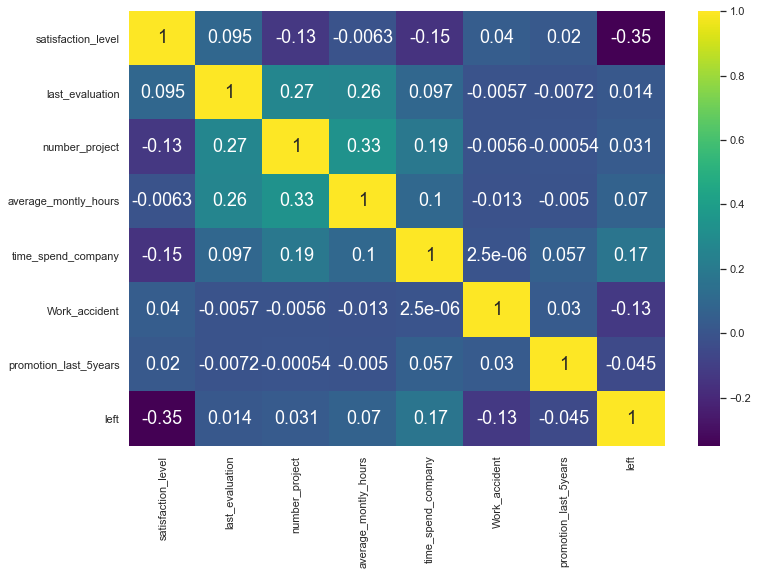

In [269]:
#Heatmap to find the correlation of the features
plt.figure(figsize=[12,8])
sns.heatmap(HR_data.corr(), annot=True, cmap="viridis");

• As shown in the heatmap the features are not corrleated ( i.e. there is no multicollinearity ). Also even though ```left```  have no strong correlation with the other features, it good to notice it have low negative correlation with ```satisfaction_level```.

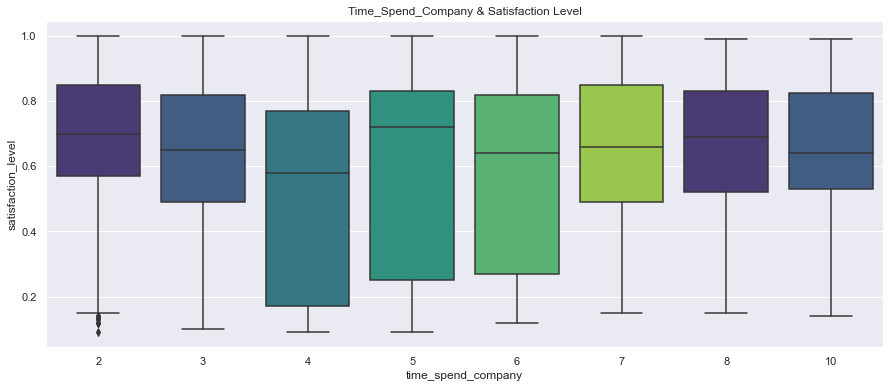

In [253]:
# Time_Spend_Company & Satisfaction Level BoxPlot  
plt.figure(figsize=[15,6])
sns.boxplot(x ='time_spend_company',y='satisfaction_level',data=HR_data, 
            palette=sns.color_palette("viridis")).set_title('Time_Spend_Company & Satisfaction Level');

• In this BoxPlot I checked if employee who work in the company for several years enjoys working there? This BoxPlot illustrates that the median of employee who work more than 6 years have satisfaction level more than 0.6 . But the real question do they stay?

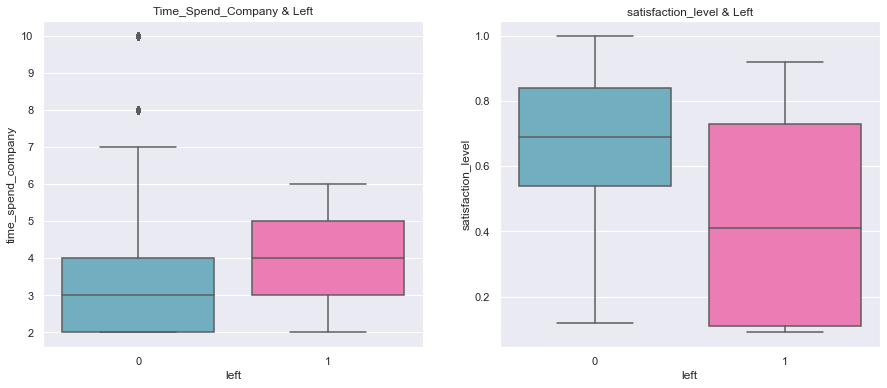

In [254]:
#Controlling the figure size 
plt.figure(figsize=[15,6])

# List of colors
mycolors = ['c','hotpink']

# Creating Subplot with 1 rows and two columns 
# BoxPlot of Time_Spend_Company & Left
plt.subplot(1, 2, 1)
sns.boxplot(x ='left',y='time_spend_company',data=HR_data, 
            palette= mycolors).set_title('Time_Spend_Company & Left');

# BoxPlot of Time_Spend_Company & Left
plt.subplot(1, 2, 2)
sns.boxplot(x ='left',y='satisfaction_level',data=HR_data, 
            palette=mycolors).set_title('satisfaction_level & Left');

• The first BoxPlot illustrates that the median of 1 (left) is higher. Which means if an employee who work more than 4 years tends to have high risk of leaving. That might means the company is losing employee who have more experience working in the company.

• Moreover, the second BoxPlot illustrates that the median of 1 (left) is lower than 0 (stayed) and have higher spread. Which means that an employee with less than 0.4 of satisfaction level have the risk of leaving. However, this knid of illustrates the negative correlation in the heatmap above.

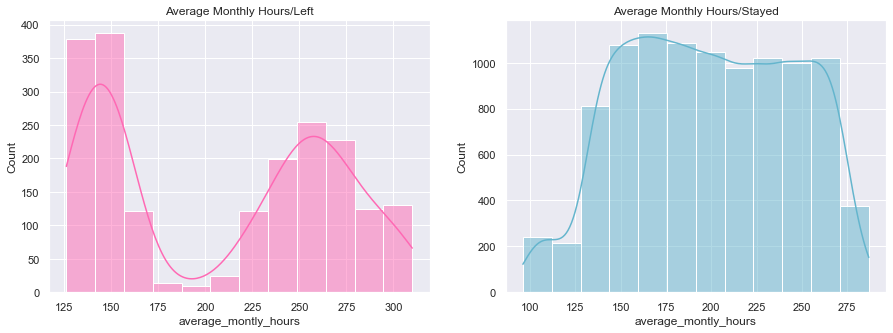

In [441]:
# Creating new datafream with only two columns
hours = HR_data[['average_montly_hours','left']]

#Controlling the figure size 
plt.figure(figsize=[15,5])

# Histogram of Average Monthly Hours/Left
plt.subplot(1, 2, 1)

#Getting information of only employee who left 
left = hours[hours['left'] == 1]
plt.title("Average Monthly Hours/Left")
sns.histplot(left['average_montly_hours'],bins=12, kde=True ,color = 'hotpink');

# Histogram of Average Monthly Hours/Stayed
plt.subplot(1, 2, 2)
plt.title("Average Monthly Hours/Stayed")

#Getting information of only employee who stayed 
not_left = hours[hours['left'] == 0]
sns.histplot(not_left['average_montly_hours'],bins=12, kde=True, color='c');

• Even though the Average Monthly Hours of employess doesn't have strong indication of whether an emplyee will Leave/Stay, the plot shows that emplyees who work between 150 and 125 hours risk of leaving. Also, employee who work more than 275 have the risk of leaving.

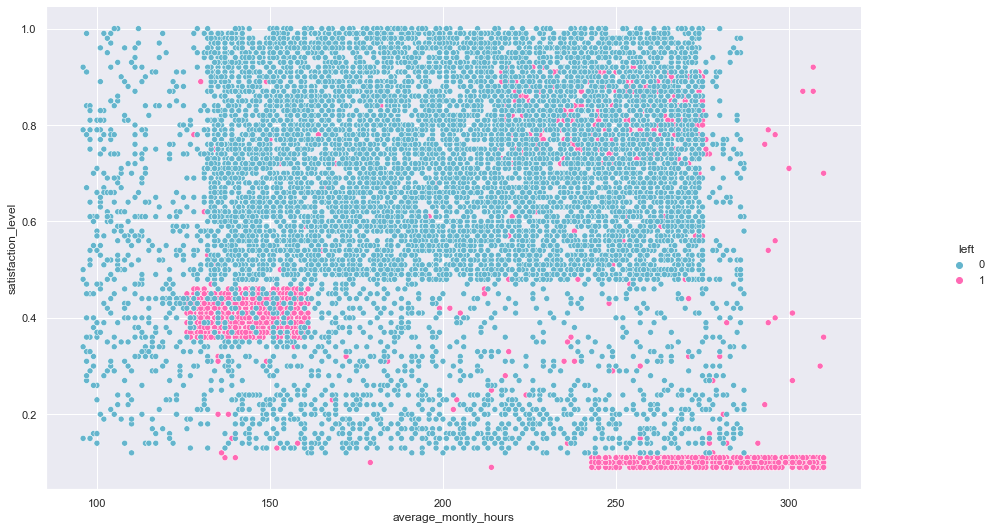

In [279]:
# RelPlot of Satisfaction Level/Average Monthly Hours
sns.relplot(x="average_montly_hours", y="satisfaction_level", hue="left", data=HR_data, palette= mycolors);
plt.gcf().set_size_inches(15, 8)

• This plot prove what we have seen above related to left/stayed. Also, it tells us those employee who work between 125 and 150 or more than 275 tends to have low satisfaction level compared to others.

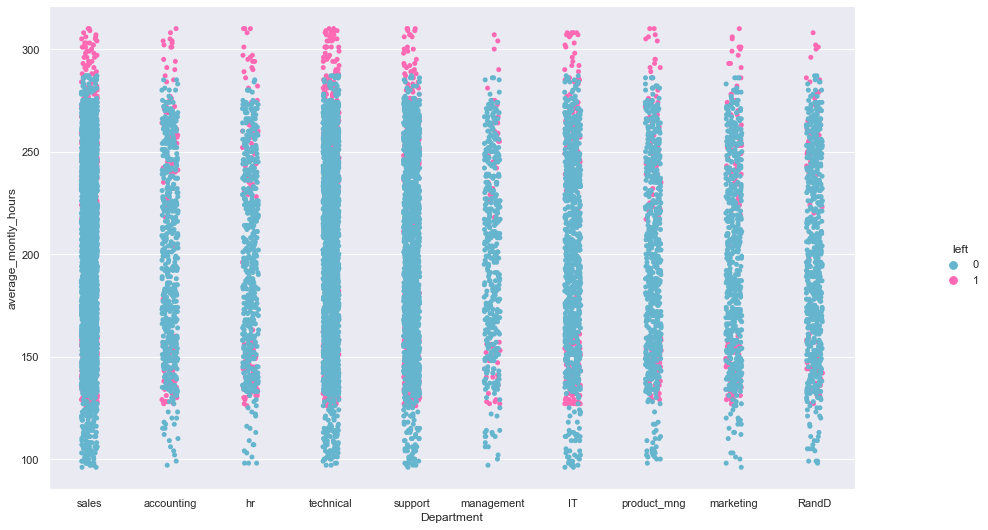

In [271]:
# Catplot of Department & average_montly_hours
sns.catplot(x="Department", y="average_montly_hours", hue="left", data=HR_data, palette= mycolors)
plt.gcf().set_size_inches(15, 8)

• Here we check if average monthly hours related to specific department. However, this catplot support what we have seen above that the employee who work more than 275 hour left the company, and this risk is not related to one department it can be in any department. 

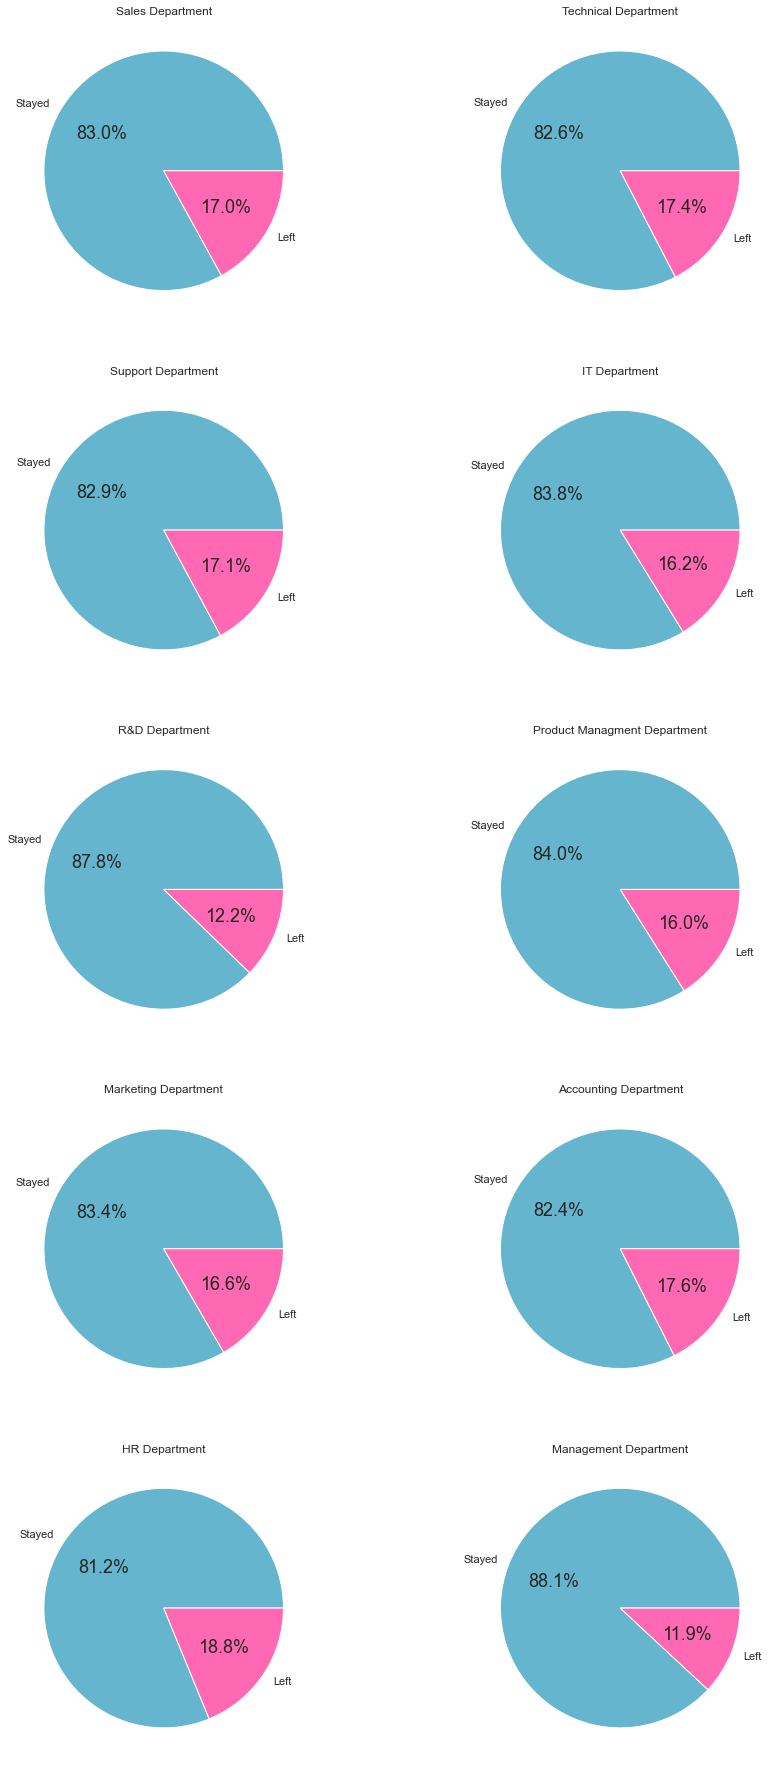

In [267]:
# Creating new datafream with only two columns
Department = HR_data[['Department','left']]

# Specifying the figure and font size
plt.figure(figsize=[15,65])
plt.rcParams.update({'font.size': 18})

# List of colors
mycolors = ['c','hotpink']

# Creating Subplot with 10 rows and two columns 
# Pie chart of Sales Department
plt.subplot(10, 2, 1)
sales = Department[Department['Department'] == 'sales']
sales = sales['left'].value_counts()
plt.title("Sales Department")
plt.pie(sales,labels=['Stayed','Left'],autopct='%1.1f%%', colors = mycolors );

# Pie chart of Technical Department
plt.subplot(10, 2, 2)
technical = Department[Department['Department'] == 'technical']
technical = technical['left'].value_counts()
plt.title("Technical Department")
plt.pie(technical,labels=['Stayed','Left'],autopct='%1.1f%%', colors = mycolors);

# Pie chart of Support Department
plt.subplot(10, 2, 3)
support = Department[Department['Department'] == 'support']
support = support['left'].value_counts()
plt.title("Support Department")
plt.pie(support,labels=['Stayed','Left'],autopct='%1.1f%%', colors = mycolors);

# Pie chart of IT Department
plt.subplot(10, 2, 4)
it = Department[Department['Department'] == 'IT']
it = it['left'].value_counts()
plt.title("IT Department")
plt.pie(it,labels=['Stayed','Left'],autopct='%1.1f%%', colors = mycolors);

# Pie chart of R&D Department
plt.subplot(10, 2, 5)
RandD = Department[Department['Department'] == 'RandD']
RandD = RandD['left'].value_counts()
plt.title("R&D Department")
plt.pie(RandD,labels=['Stayed','Left'],autopct='%1.1f%%', colors = mycolors);

# Pie chart of Product Managment Department
plt.subplot(10, 2, 6)
product_mng = Department[Department['Department'] == 'product_mng']
product_mng = product_mng['left'].value_counts()
plt.title("Product Managment Department")
plt.pie(product_mng,labels=['Stayed','Left'],autopct='%1.1f%%', colors = mycolors);

# Pie chart of Marketing Department
plt.subplot(10, 2, 7)
marketing = Department[Department['Department'] == 'marketing']
marketing = marketing['left'].value_counts()
plt.title("Marketing Department")
plt.pie(marketing,labels=['Stayed','Left'],autopct='%1.1f%%', colors = mycolors);

# Pie chart of Accounting Department
plt.subplot(10, 2, 8)
accounting = Department[Department['Department'] == 'accounting']
accounting = accounting['left'].value_counts()
plt.title("Accounting Department")
plt.pie(accounting,labels=['Stayed','Left'],autopct='%1.1f%%', colors = mycolors);

# Pie chart of HR Department
plt.subplot(10, 2, 9)
hr = Department[Department['Department'] == 'hr']
hr = hr['left'].value_counts()
plt.title("HR Department")
plt.pie(hr,labels=['Stayed','Left'],autopct='%1.1f%%', colors = mycolors);

# Pie chart of Management Department
plt.subplot(10, 2, 10)
management = Department[Department['Department'] == 'management']
management = management['left'].value_counts()
plt.title("Management Department")
plt.pie(management,labels=['Stayed','Left'],autopct='%1.1f%%', colors = mycolors);

• This subplot answers if there a departments who have a high risk of leaving or not? All department in the company have close percentage of left. However, HR department, Accounting department, and Technical department are the 3 top department with the highest risk of leaving. And the Management and R&D departments have the lowest percentage of left compared to the other departments.

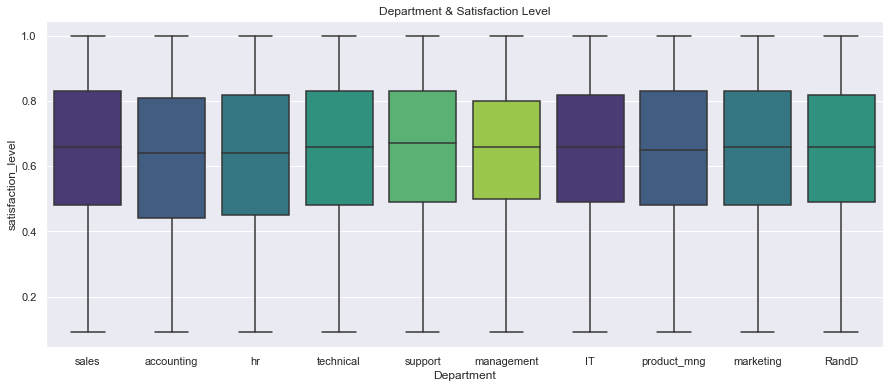

In [252]:
# Department & Satisfaction Level    
plt.figure(figsize=[15,6])
sns.boxplot(x ='Department',y='satisfaction_level',data=HR_data, 
            palette=sns.color_palette("viridis")).set_title('Department & Satisfaction Level');

• Here we want to check the satisfaction level of employee in each department. This boxplot kind of support what we have seen above, HR department and Accounting department exculiding the Technical department do have lower median of ```satisfaction_level``` compared to the other departments. 

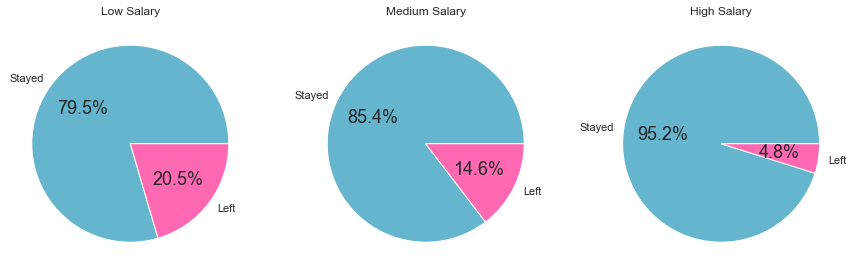

In [274]:
# Creating new datafream with only two columns
salary = HR_data[['salary','left']]

# Specifying the figure and font size
plt.figure(figsize=[15,65])
plt.rcParams.update({'font.size': 18})

# List of colors
mycolors = ['c','hotpink']

# Creating Subplot with 1 rows and 3 columns 
# Pie chart of Sales Department
plt.subplot(1, 3, 1)
low = salary[salary['salary'] == 'low']
low = low['left'].value_counts()
plt.title("Low Salary")
plt.pie(low,labels=['Stayed','Left'],autopct='%1.1f%%', colors = mycolors );

# Pie chart of Technical Department
plt.subplot(1, 3, 2)
medium = salary[salary['salary'] == 'medium']
medium = medium['left'].value_counts()
plt.title("Medium Salary")
plt.pie(medium,labels=['Stayed','Left'],autopct='%1.1f%%', colors = mycolors);

# Pie chart of Support Department
plt.subplot(1, 3, 3)
high = salary[salary['salary'] == 'high']
high = high['left'].value_counts()
plt.title("High Salary")
plt.pie(high,labels=['Stayed','Left'],autopct='%1.1f%%', colors = mycolors);

• This figure illustrates that employee with low and Medium salary are the highest of risk leaving.

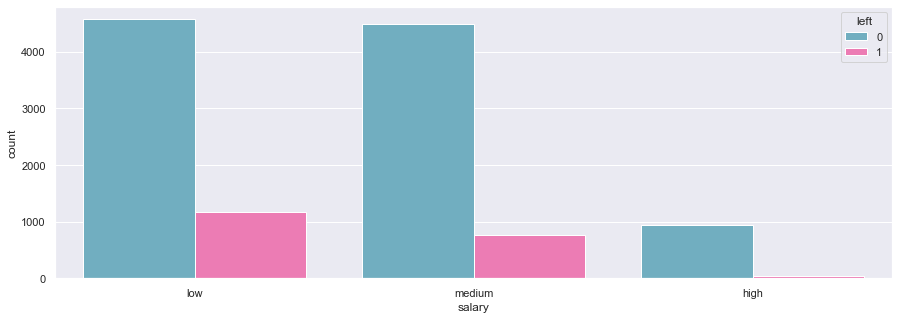

In [273]:
# CountPlot of Salary & Left
plt.figure(figsize=[15,5])
sns.countplot(x="salary", hue="left", data=HR_data, palette=mycolors);

• However, the plot illustrates that there is small amount of employee who is paid High. Which we can say that the company offers low and medium salaries.

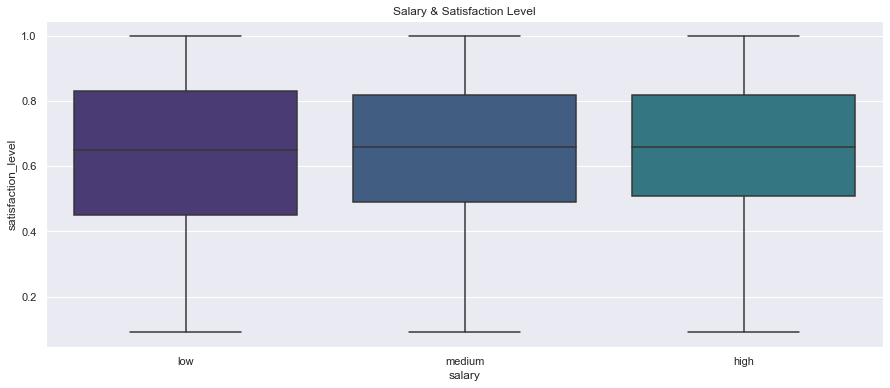

In [276]:
# Salary & Satisfaction Level    
plt.figure(figsize=[15,6])
sns.boxplot(x ='salary',y='satisfaction_level',data=HR_data, 
            palette=sns.color_palette("viridis")).set_title('Salary & Satisfaction Level');

• The plot shows that they are have close median of satisfaction level between salary ranges. However, if you look closely we can see that low have lower median of satisfaction level and higher spread compared to others.

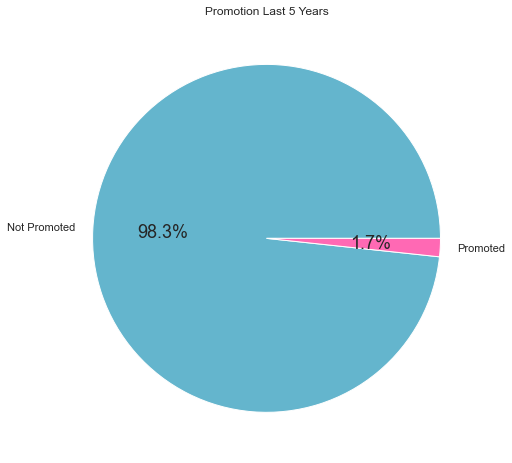

In [297]:
# Promotion Last 5 Years Pie Chart
prom = HR_data[['promotion_last_5years']]
prom = prom['promotion_last_5years'].value_counts()
plt.title("Promotion Last 5 Years")
plt.pie(prom,labels=['Not Promoted','Promoted'],autopct='%1.1f%%', colors = mycolors);

Also, Using this piechart it's good to notice that the company over the last 5 years have 1.7% of people who get promoted.

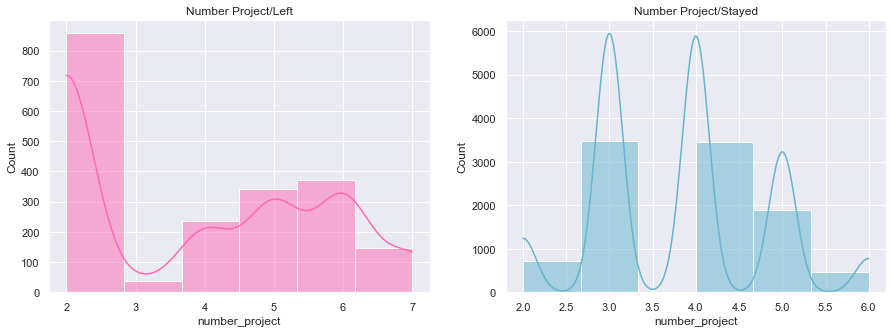

In [251]:
# Creating new datafream with only two columns
hours = HR_data[['number_project','left']]
plt.figure(figsize=[15,5])

# Histogram of Number Project/Left
plt.subplot(1, 2, 1)
left = hours[hours['left'] == 1]
plt.title("Number Project/Left")
sns.histplot(left['number_project'],bins=6, kde=True,color = 'hotpink');

# Histogram of Number Project/Stayed
plt.subplot(1, 2, 2)
plt.title("Number Project/Stayed")
not_left = hours[hours['left'] == 0]
sns.histplot(not_left['number_project'],bins=6, kde=True, color = 'c');

• Even though the Number Project of employess doesn't have strong indication of whether an emplyee will Leave/Stay, the plot shows that emplyees who work less than 3 project or more than 5 project havel left the company.

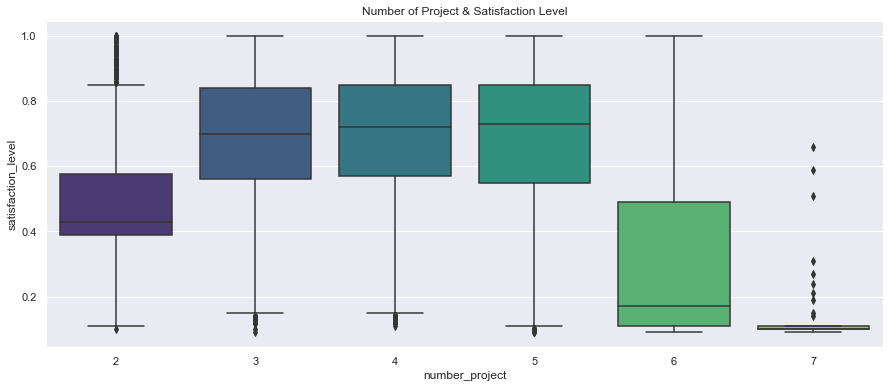

In [281]:
# Number of Project & Satisfaction Level    
plt.figure(figsize=[15,6])
sns.boxplot(x ='number_project',y='satisfaction_level',data=HR_data, 
            palette=sns.color_palette("viridis")).set_title('Number of Project & Satisfaction Level');

•This BoxPlot shows what we have seen above. And it's intersting to notice that those employee who work less than 3 and more than 5 and have left the company tends to have lower  ```satisfaction_level```.

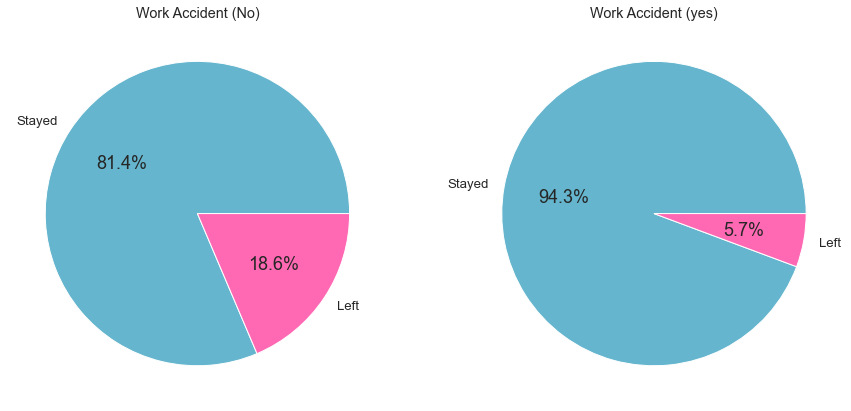

In [192]:
# Creating new datafream with only two columns
Work_accident = HR_data[['Work_accident','left']]

# Specifying the figure and font size
plt.figure(figsize=[15,65])
plt.rcParams.update({'font.size': 18})

# List of colors
mycolors = ['c','hotpink']

# Creating Subplot with 1 rows and 2 columns 
# Pie chart of Sales Department
plt.subplot(1, 2, 1)
no_acc = Work_accident[Work_accident['Work_accident'] == 0]
no_acc = no_acc['left'].value_counts()
plt.title("Work Accident (No)")
plt.pie(no_acc,labels=['Stayed','Left'],autopct='%1.1f%%', colors = mycolors );

# Pie chart of Technical Department
plt.subplot(1, 2, 2)
yes_acc = Work_accident[Work_accident['Work_accident'] == 1]
yes_acc = yes_acc['left'].value_counts()
plt.title("Work Accident (yes)")
plt.pie(yes_acc,labels=['Stayed','Left'],autopct='%1.1f%%', colors = mycolors);

• This figure illustrates that employee how have an accident at work are not likely to leave the company.

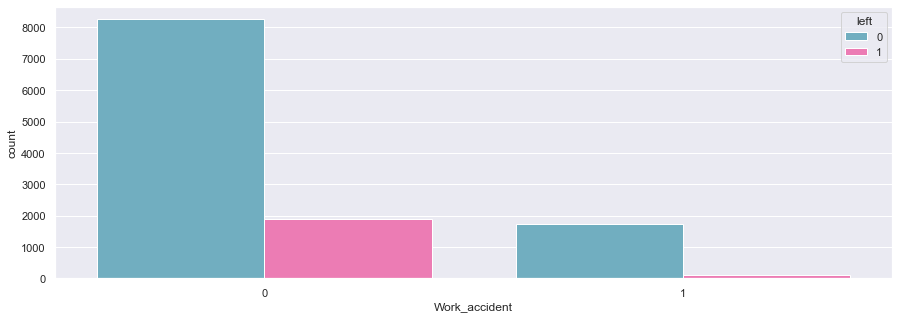

In [288]:
# CountPlot of Work Accident & Left
plt.figure(figsize=[15,5])
sns.countplot(x="Work_accident", hue="left", data=HR_data, palette=mycolors);

• It's good to notice that there is lower number of work accident. We can say that those employee are professtional or maybe there is some work accident who have not been reported.

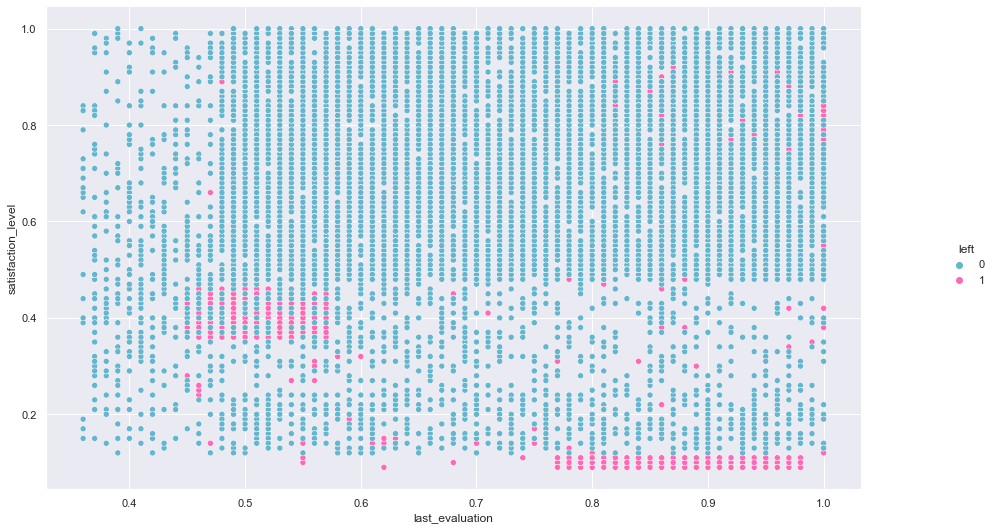

In [282]:
# RelPlot of Satisfaction Level/Last Evaluation
sns.relplot(x="last_evaluation", y="satisfaction_level", hue="left", data=HR_data, palette= mycolors);
plt.gcf().set_size_inches(15, 8)

• Here you can see that the company might have high risk of losing no only employee who have more experiences but also employee who have high evaluation. Also, this plot kind of shows something we have seen above I will discuss next RelPlot.

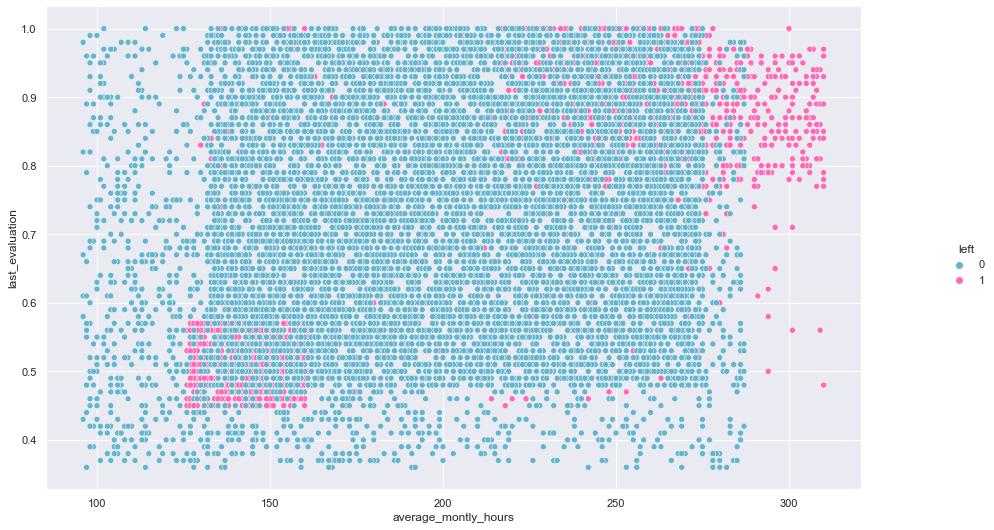

In [286]:
# RelPlot of Average Montly Hours/Last Evaluation
sns.relplot(x="average_montly_hours", y="last_evaluation", hue="left", data=HR_data, palette= mycolors);
plt.gcf().set_size_inches(15, 8)

• Also, notice theos employee who have work more than 275 hours and have high evaluation are those employee who have low satisfaction level. And as we seen above if employee have low satisfaction level they have high the risk of leaving. 

• Moreover, notice theos employee who have work between 150 and 125 hours and have low evaluation are those employee who have low satisfaction level. And as we seen above if employee have low satisfaction level they have high the risk of leaving. 

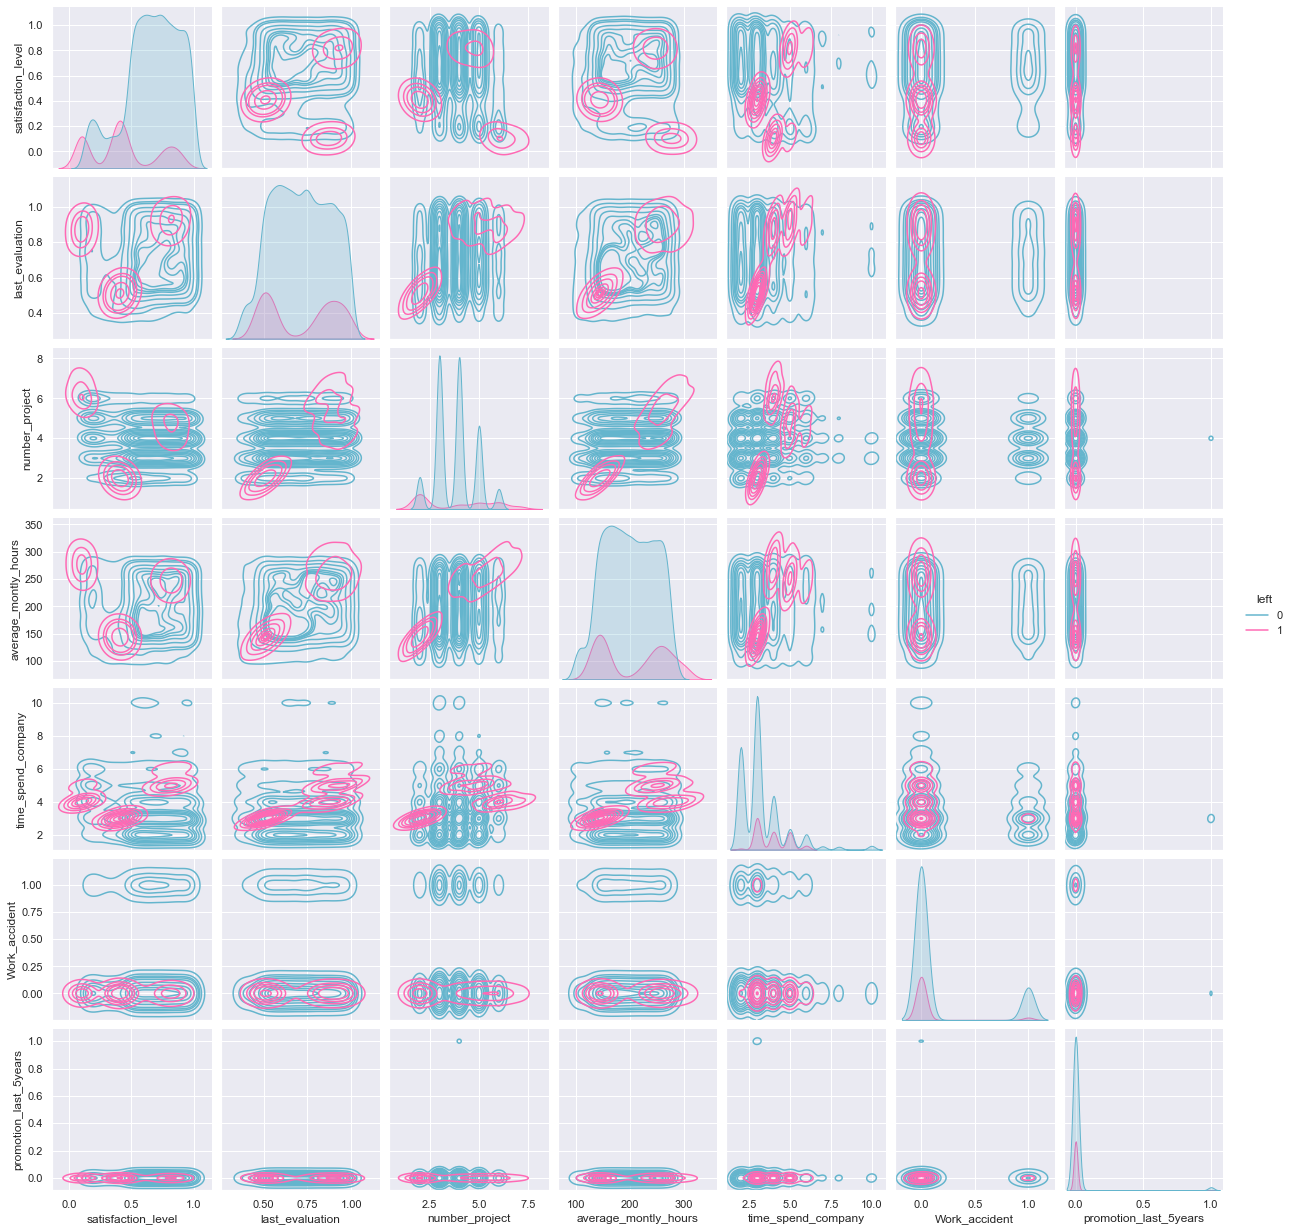

In [287]:
#Pair Plot to find relationship between the feature and the target (left)
sns.pairplot(HR_data, hue='left', kind='kde', palette=mycolors);

• This Pair Plot shows that there is no relationship between the feature and the target (left) and this comes no surpirse as you can see in the **Data Transformation** section the dataset is imbalanced. And deu to low **left** observation it can be difficult to find the relationship.

##  ⚙️ Data Transformation

### Check the balance of the data

In [23]:
# Checking if sampling is required
HR_data.left.value_counts()

0    10000
1     1991
Name: left, dtype: int64

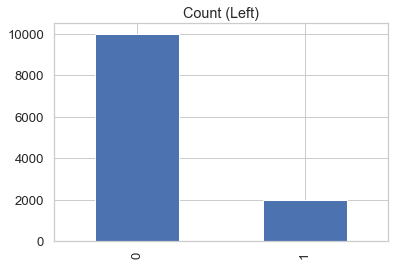

In [24]:
# Plot of the target
HR_data.left.value_counts().plot(kind='bar', title='Count (Left)');

 • The figure show that the data is highly unbalance

### Preforming a random under sampling to balance the data.

In [25]:
# Counting the target (Left or Stayed)
stayed_0_count, left_1_count = HR_data.left.value_counts()

# Divide by target (Left or Stayed)
stayed_0 = HR_data[HR_data['left'] == 0]
left_1 = HR_data[HR_data['left'] == 1]

Left after random under-sampling:
0    1991
1    1991
Name: left, dtype: int64


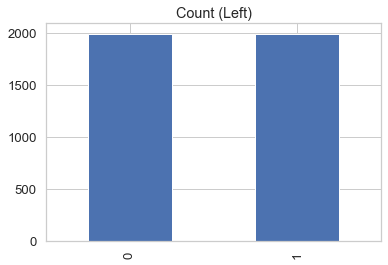

In [27]:
# Preforming the undersampling for stayed (0)
stayed_0_under = stayed_0.sample(left_1_count)
HR_data_bal = pd.concat([stayed_0_under, left_1], axis=0)

print('Left after random under-sampling:')
print(HR_data_bal.left.value_counts())

# Plot of left variable after undersampling
HR_data_bal.left.value_counts().plot(kind='bar', title='Count (Left)');

 • The plot show that the data is now balanceed

In [443]:
# Checking the number of dataset after undersampling
HR_data_bal.shape

(3982, 10)

• However, In the project requirement I need to train my model will dataset around 7000-10000 rows. And after preforming random undersampling the dataset have 3982 rows which is not acceptable. 

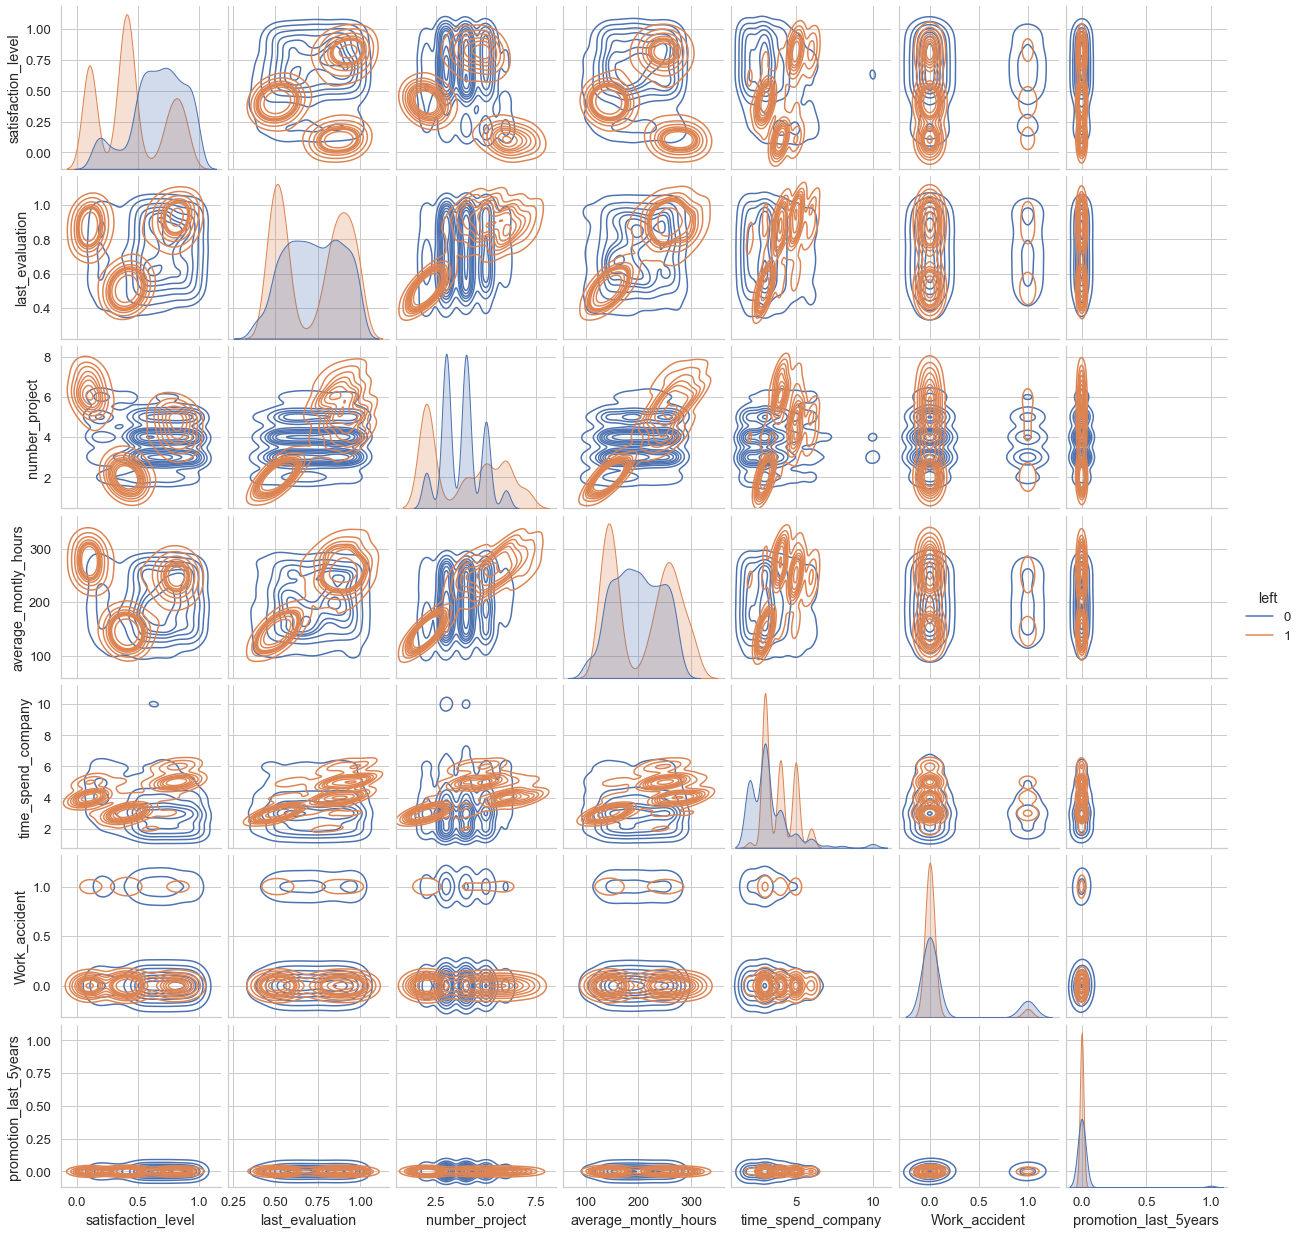

In [30]:
#Pair Plot relationship between the feature and the target (left) after random under-sampling
sns.pairplot(HR_data_bal, hue='left', kind='kde');

• However, after performing random under-sampling this Pair Plot shows that there is an improvement in the relationship between some features.

## 👷🏻‍♀️ Feature Engineering (Binning)

Here we preform data binning by grouping individual data values into specific bins or groups according to defined criteria. 

In [464]:
# Make a copy of our datafream
HR_data_bin = HR_data.copy()
HR_data_bin.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  promotion_last_5years Department  \
0                   3              0                      0      sales   
1                   6              0                      0      sales   
2                   4              0                      0      sales   
3                   5              0                      0      sales   
4                   3              0                      0      sales   

   salary  left  
0     low     1  
1  medium     1  
2  medium     1  
3     low     1  
4     low     1

#### Satisfaction Level Binning 
    
#### • Low  — ( 0.0 , 0.49 )

#### • Mid  — ( 0.5 , 0.69 )

#### • High — ( 0.7 , 1.0 )

In [465]:
# Binning Satisfaction Level
satisfaction_level_cat = pd.cut(HR_data_bin.satisfaction_level,bins=[0,0.49,0.69,1],labels=['Low','Mid','High'])

# Insert Column to the datafream
HR_data_bin.insert(1,'satisfaction_level_cat', satisfaction_level_cat)

In [466]:
# Drop satisfaction_level column
HR_data_bin.drop('satisfaction_level', axis='columns', inplace=True)

In [467]:
# Visualizing relationship 
CrosstabResult=pd.crosstab(index = HR_data_bin.satisfaction_level_cat, columns = HR_data_bin.left)
print(CrosstabResult)

left                       0     1
satisfaction_level_cat            
Low                     1772  1412
Mid                     3347    49
High                    4881   530


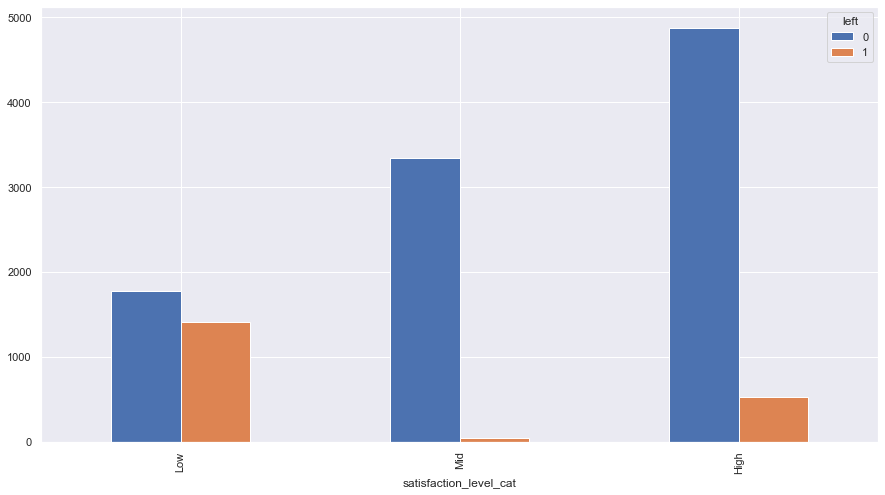

In [468]:
# Grouped bar chart
CrosstabResult.plot.bar();

• Visualizing relationship between two categorical variables (```satisfaction_level_cat``` and ```left```) using a grouped bar chart after preforming Binning. As shown in the graph employee with low satisfaction level have the risk of leaving.

#### Last Evaluation Binning

#### • Low  — ( 0.0 , 0.49 )

#### • Mid  — ( 0.5 , 0.69 )

#### • High — ( 0.7 , 1.0 )

In [469]:
# Binning Last Evaluation
last_evaluation_cat = pd.cut(HR_data_bin.last_evaluation,bins=[0,0.49,0.69,1],labels=['Low','Mid','High'])

# Insert Column to the datafream
HR_data_bin.insert(1,'last_evaluation_cat', last_evaluation_cat)

In [470]:
# Drop last_evaluation column
HR_data_bin.drop('last_evaluation', axis='columns', inplace=True)

In [471]:
# Visualizing relationship 
CrosstabResult2=pd.crosstab(index = HR_data_bin.last_evaluation_cat, columns = HR_data_bin.left)
print(CrosstabResult)

left                       0     1
satisfaction_level_cat            
Low                     1772  1412
Mid                     3347    49
High                    4881   530


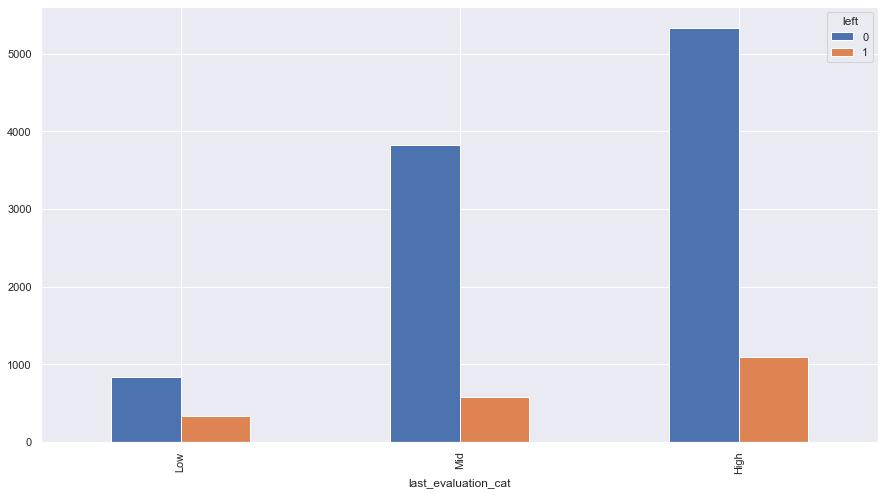

In [472]:
# Grouped bar chart
CrosstabResult2.plot.bar();

• Visualizing relationship between two categorical variables (```last_evaluation_cat``` and ```left```) using a grouped bar chart after preforming Binning. As shown in the graph employee with high last evaluation might have the risk of leaving.

## 🔎 The HR dataset after binning

In [473]:
HR_data_bin.head()

satisfaction_level_cat last_evaluation_cat  number_project  \
0                    Low                 Mid               2   
1                   High                High               5   
2                    Low                High               7   
3                   High                High               5   
4                    Low                 Mid               2   

   average_montly_hours  time_spend_company  Work_accident  \
0                   157                   3              0   
1                   262                   6              0   
2                   272                   4              0   
3                   223                   5              0   
4                   159                   3              0   

   promotion_last_5years Department  salary  left  
0                      0      sales     low     1  
1                      0      sales  medium     1  
2                      0      sales  medium     1  
3                      0      sales     low     1  
4                      0      sales     low     1

## 🤕 Dummy Variable Conversion

#### • ```satisfaction_level_cat``` dummy variable conversion

In [474]:
# Get Dummies for satisfaction_level_cat (Low, Mid, High)
dummy_satisfaction_level_cat = pd.get_dummies(HR_data_bin.satisfaction_level_cat, drop_first=True)
# Rename columns name
dummy_satisfaction_level_cat.rename(columns = {'Mid': 'satisfaction_level[Mid]', 'High': 'satisfaction_level[High]'}, inplace = True)
dummy_satisfaction_level_cat

satisfaction_level[Mid]  satisfaction_level[High]
0                            0                         0
1                            0                         1
2                            0                         0
3                            0                         1
4                            0                         0
...                        ...                       ...
11995                        0                         1
11996                        0                         1
11997                        0                         1
11998                        0                         0
11999                        1                         0

[11991 rows x 2 columns]

#### • ```last_evaluation_cat``` dummy variable conversion

In [475]:
#Get Dummies for last_evaluation_cat (Low, Mid, High)
dummy_last_evaluation_cat = pd.get_dummies(HR_data_bin.last_evaluation_cat, drop_first=True)
# Rename columns name
dummy_last_evaluation_cat.rename(columns = {'Mid': 'last_evaluation[Mid]', 'High': 'last_evaluation[High]'}, inplace = True)
dummy_last_evaluation_cat

last_evaluation[Mid]  last_evaluation[High]
0                         1                      0
1                         0                      1
2                         0                      1
3                         0                      1
4                         1                      0
...                     ...                    ...
11995                     1                      0
11996                     0                      1
11997                     1                      0
11998                     1                      0
11999                     0                      1

[11991 rows x 2 columns]

#### • ```salary``` dummy variable conversion

In [476]:
#Get Dummies for salary (Low, Mid, High)
dummy_salary = pd.get_dummies(HR_data_bin.salary, drop_first=True)
# Rename columns name
dummy_salary.rename(columns = {'low': 'salary[low]', 'medium': 'salary[medium]'}, inplace = True)
dummy_salary

salary[low]  salary[medium]
0                1               0
1                0               1
2                0               1
3                1               0
4                1               0
...            ...             ...
11995            0               0
11996            0               0
11997            0               0
11998            0               0
11999            1               0

[11991 rows x 2 columns]

#### • ```Department``` dummy variable conversion

In [477]:
#Get Dummies for Department
dummy_Department = pd.get_dummies(HR_data_bin.Department, drop_first=True)
dummy_Department

RandD  accounting  hr  management  marketing  product_mng  sales  \
0          0           0   0           0          0            0      1   
1          0           0   0           0          0            0      1   
2          0           0   0           0          0            0      1   
3          0           0   0           0          0            0      1   
4          0           0   0           0          0            0      1   
...      ...         ...  ..         ...        ...          ...    ...   
11995      0           0   0           1          0            0      0   
11996      0           0   0           1          0            0      0   
11997      0           0   0           1          0            0      0   
11998      0           0   0           0          1            0      0   
11999      0           0   0           0          0            0      0   

       support  technical  
0            0          0  
1            0          0  
2            0          0  
3            0          0  
4            0          0  
...        ...        ...  
11995        0          0  
11996        0          0  
11997        0          0  
11998        0          0  
11999        0          0  

[11991 rows x 9 columns]

In [478]:
# Concatenate Datafreams
HR_data_bin_dum = pd.concat([HR_data_bin,dummy_salary,dummy_Department,dummy_last_evaluation_cat,dummy_satisfaction_level_cat], axis=1)

# Dropping unnecessary columns
HR_data_bin_dum.drop(['satisfaction_level_cat','last_evaluation_cat','Department','salary'], axis='columns', inplace=True)
HR_data_bin_dum

number_project  average_montly_hours  time_spend_company  \
0                   2                   157                   3   
1                   5                   262                   6   
2                   7                   272                   4   
3                   5                   223                   5   
4                   2                   159                   3   
...               ...                   ...                 ...   
11995               3                   259                  10   
11996               5                   266                  10   
11997               3                   185                  10   
11998               3                   172                  10   
11999               4                   180                   3   

       Work_accident  promotion_last_5years  left  salary[low]  \
0                  0                      0     1            1   
1                  0                      0     1            0   
2                  0                      0     1            0   
3                  0                      0     1            1   
4                  0                      0     1            1   
...              ...                    ...   ...          ...   
11995              1                      1     0            0   
11996              0                      1     0            0   
11997              0                      1     0            0   
11998              0                      1     0            0   
11999              0                      0     0            1   

       salary[medium]  RandD  accounting  ...  management  marketing  \
0                   0      0           0  ...           0          0   
1                   1      0           0  ...           0          0   
2                   1      0           0  ...           0          0   
3                   0      0           0  ...           0          0   
4                   0      0           0  ...           0          0   
...               ...    ...         ...  ...         ...        ...   
11995               0      0           0  ...           1          0   
11996               0      0           0  ...           1          0   
11997               0      0           0  ...           1          0   
11998               0      0           0  ...           0          1   
11999               0      0           0  ...           0          0   

       product_mng  sales  support  technical  last_evaluation[Mid]  \
0                0      1        0          0                     1   
1                0      1        0          0                     0   
2                0      1        0          0                     0   
3                0      1        0          0                     0   
4                0      1        0          0                     1   
...            ...    ...      ...        ...                   ...   
11995            0      0        0          0                     1   
11996            0      0        0          0                     0   
11997            0      0        0          0                     1   
11998            0      0        0          0                     1   
11999            0      0        0          0                     0   

       last_evaluation[High]  satisfaction_level[Mid]  \
0                          0                        0   
1                          1                        0   
2                          1                        0   
3                          1                        0   
4                          0                        0   
...                      ...                      ...   
11995                      0                        0   
11996                      1                        0   
11997                      0                        0   
11998                      0                        0   
11999                      1                        1   

      

In [479]:
HR_data_bin_dum.columns

Index(['number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years', 'left', 'salary[low]',
       'salary[medium]', 'RandD', 'accounting', 'hr', 'management',
       'marketing', 'product_mng', 'sales', 'support', 'technical',
       'last_evaluation[Mid]', 'last_evaluation[High]',
       'satisfaction_level[Mid]', 'satisfaction_level[High]'],
      dtype='object')

## 📦 Train and Test Split

In [554]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into train set and test set as 70%-30%
X_train,X_test,y_train,y_test = train_test_split(HR_data_bin_dum.drop('left', axis=1),HR_data_dum['left'],test_size=0.33, random_state=101)

## 📈 Feature Scaling

Scaling all features to be equally in weigh .

In [555]:
from sklearn.preprocessing import StandardScaler

# Creating object of StandardScaler
SC = StandardScaler()

In [556]:
# StandardScaler for the traininf and testing dataset
X_train_SC = SC.fit_transform(X_train)
X_test_SC = SC.fit_transform(X_test)

# 🕵️ Model Traning
I will train the model with different models 

In [557]:
# Improting models using sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Improting evaluation metrics using sklearn
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Logistic Regression

In [558]:
# Create a Logistic Regression Model
lr = LogisticRegression()

In [559]:
# Train the model
lr.fit(X_train_SC,y_train)
# Getting Training score
lr_train_acc = lr.score(X_train_SC, y_train)

In [560]:
# Testing the model
y_pred = lr.predict(X_test_SC)
# Getting Testing score
lr_test_acc = accuracy_score(y_test,y_pred)

In [561]:
print(f"Training Accuracy of Logistic Regression Model is {lr_train_acc}")
print(f"Test Accuracy of Logistic Regression Model is {lr_test_acc}")

Training Accuracy of Logistic Regression Model is 0.8380430723266525
Test Accuracy of Logistic Regression Model is 0.8345123799898939


In [562]:
# Printing Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.90      3278
           1       0.53      0.29      0.38       680

    accuracy                           0.83      3958
   macro avg       0.70      0.62      0.64      3958
weighted avg       0.81      0.83      0.81      3958



In [563]:
# Printing Confusion Matrix
print(confusion_matrix(y_test,y_pred))

[[3104  174]
 [ 481  199]]


**Although we have imbalanced dataset Logistic Regression got an f1-score of 0.90 and weighted avg of 0.81 which can be consider as good. However, in the confusion matrix we can see alot of Left observation were misclassified. This model doesn't serve the goal of the project.**

# Decision Tree

In [564]:
# Create a Decision Tree Model
dt = DecisionTreeClassifier()

In [565]:
# Train the model
dt.fit(X_train_SC,y_train)
# Getting Training score
dt_train_acc = dt.score(X_train_SC, y_train)

In [566]:
# Testing the model
y_pred = dt.predict(X_test_SC)
# Getting Testing score
dt_test_acc = accuracy_score(y_test,y_pred)

In [567]:
print(f"Training Accuracy of Decision Tree Model is {dt_train_acc}")
print(f"Test Accuracy of Decision Tree Model is {dt_test_acc}")

Training Accuracy of Decision Tree Model is 0.9986306485746297
Test Accuracy of Decision Tree Model is 0.9608388074785245


In [568]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3278
           1       0.88      0.90      0.89       680

    accuracy                           0.96      3958
   macro avg       0.93      0.93      0.93      3958
weighted avg       0.96      0.96      0.96      3958



In [569]:
# confusion matrix
confusion_matrix(y_test, y_pred)

array([[3194,   84],
       [  71,  609]])

**Although we have imbalanced dataset Decision Tree got an f1-score of 0.98 and weighted avg of 0.96 which is the best performance I got. Also, it good to mention that in the confusion matrix we can see there is smaller amount of Left observation were misclassified compared to the Logistic Regression. This model does serve the goal of the project.**

# KNN

In [526]:
# Create a KNN Model with n = 4
knn = KNeighborsClassifier(n_neighbors=4)

In [527]:
# Train the model
knn.fit(X_train_SC,y_train)
# Getting Training score
knn_train_acc = knn.score(X_train_SC, y_train)

In [528]:
# Testing the model
y_pred = knn.predict(X_test_SC)
# Getting Testing score
knn_test_acc = accuracy_score(y_test,y_pred)

In [570]:
print(f"Training Accuracy of KNN Model is {knn_train_acc}")
print(f"Test Accuracy of KNN Model is {knn_test_acc}")

Training Accuracy of KNN Model is 0.9657662143657413
Test Accuracy of KNN Model is 0.9557857503789793


In [530]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3278
           1       0.88      0.86      0.87       680

    accuracy                           0.96      3958
   macro avg       0.92      0.92      0.92      3958
weighted avg       0.96      0.96      0.96      3958



In [531]:
print(confusion_matrix(y_test,y_pred))

[[3195   83]
 [  92  588]]


**Although we have imbalanced dataset KNN model got an f1-score of 0.97 and weighted avg of 0.96 which is the second best performance I got. Also, it good to mention that in the confusion matrix we can see there is there is more amount of Left observation were misclassified compared to the Decision Tree. This model also does serve the goal of the project.**

In [524]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

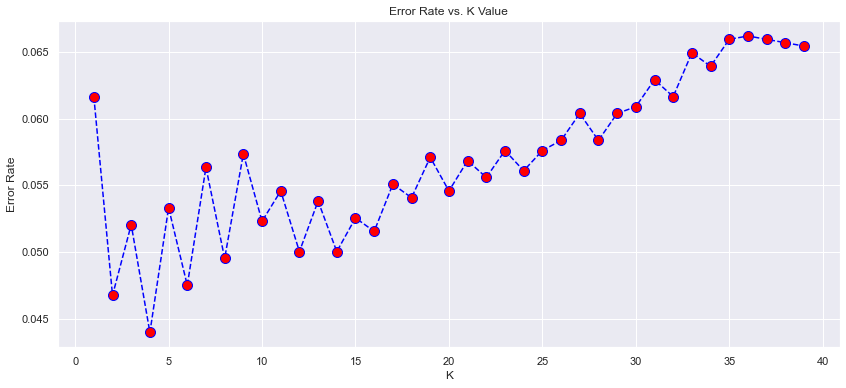

In [525]:
plt.figure(figsize=(14,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## 📝 Questions and Contribution

### How likely is an employee to leave their company or stay in the company?

• We can say that if the average monthly hour is higher than 275, it can be a reason that an employee considers leaving. Also, we can say that an employee who works on more than 5 projects might consider leaving. Furthermore, based on the plots if an employee who has a low salary might consider leaving. 

### What is the main reason that causes employees to leave?

• It is difficult to pinpoint the main reason that causes the employees to leave the company. The data set captured a poor number of features that might have an association with the actual reason of leaving. The employee can have several reasons that the HR department cannot capture in the dataset, such as transportation, family responsibility, health issues, or bad boss, and more.

### How many factors influence an employee to leave their current job? 

• Due to significant data imbalance and the poor number of features, it's difficult to elect the reasons.

### Which is the department that has the most risk of leaving in future? 

• All department in the company have close and low percentage of left. However, HR department, Accounting department, and Technical department are the 3 top department with the highest risk of leaving.

### Can this model help to form a better workplace culture by identifying the factors that cause an employee to leave? 

• We can say that the company should take notice of the satisfaction_level of an employee when it gets lower. 

• Also, based on the plots in the EDA section, we can see that the company offers only high salaries to a small group of employees. Also, it is good to notice that the company has a high percentage of employees who left the company with low/mid salaries. This might mean that the company is underpaying its employees. 

• Furthermore, we noticed that the company promotes only a small percentage, this might mean that the company environment is not rewarding. This also might be the reason why employees with high last evaluation and who have more than 6 years of experience consider leaving.  

• Lastly, we have seen that a group of an employee who worked more hours and more projects tends to leave. This also might mean that the company might overwork their employee and should pay attention to that 

# Thank you for listening 👋